# Kevin Alvarez CSC 217 Fall 2019 Homework 3

Run top to bottom

In [32]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1) As per 538, the Jets have a 40% chance of winning next week's game. What distribution can we use to map out this experiment? What inputs will go into this distribution? What are the PMFs and CDFs of all of the possible outcomes in the sample space for this scenario?

In [33]:
dist = stats.bernoulli(p=0.4)

In [34]:
dist.pmf(0)

0.6

In [35]:
dist.pmf(1)

0.4

In [36]:
dist.cdf(0)

0.6

In [37]:
dist.cdf(1)

1.0

2) If there are 16 games in a season, and the Jets have a 40% chance of winning each game, what is the expected number of games that they will win (pretend the season hasn't started yet)? Please return the exact value if it's not an integer.

In [38]:
dist = stats.binom(n=16,p=0.4)
dist.rvs()

6

3) What are the odds that they win 5 games or less this season? (again, pretend the season hasn't started yet)

In [39]:
dist.cdf(5)

0.32884041250897894

4) What are the odds that it will take them exactly 3 games to win their first game?

In [40]:
dist = stats.geom(0.4)
dist.pmf(4)

0.08639999999999999

5) What are the odds that it will take them at least 5 games to win their first game?

In [41]:
dist.cdf(5)

0.92224

6) Say they need to win 10 games or more to make the playoffs (out of 16). What are their odds of making the playoffs?

In [42]:
1 - dist.cdf(10)

0.006046617600000026

7) Now find the PMF values of the Jets winning 0 - 16 games. Which result has the highest chance of occuring, and what is the PMF of that result?

0.031103999999999993


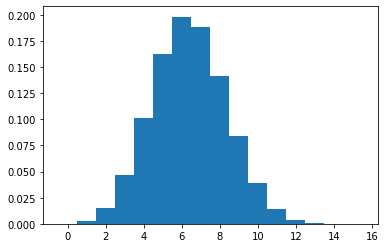

In [43]:
values = np.array([])
pmf_values = np.array([])
for i in range(16):
    values = np.append(values, i)
    pmf_values = np.append(pmf_values, stats.binom.pmf(n=16, p=0.4, k=i))
plt.bar(values, height=pmf_values, width=1)
print(dist.pmf(6))

6 games -~20%

8) Using a seed of 42 (like below), simulate 100 16-game seasons for the Jets. Plot the histogram and boxplot for the result. What is the mean number of wins in your simulated 100 seasons? What is the median? What is the standard deviation? Is the mean the same or different than the expected number of games that they will win? Why or why not?

[1 6 3 2 1 1 1 4 2 3 1 7 4 1 1 1 1 2 2 1 2 1 1 1 2 4 1 2 2 1 2 1 1 6 7 4 1
 1 3 2 1 2 1 5 1 3 1 2 2 1 7 3 6 5 2 5 1 1 1 1 1 1 4 1 1 2 1 4 1 9 3 1 1 4
 3 3 3 1 1 1 4 2 1 1 1 1 3 2 5 2 1 3 3 2 3 2 2 2 1 1]
2.29
2.0
1.7046700560519037


(array([46., 22., 13.,  8.,  0.,  4.,  3.,  3.,  0.,  1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

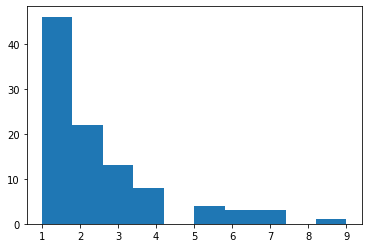

In [44]:
np.random.seed(42)
results = dist.rvs(size=100)
print(results)
print(results.mean())
print(np.median(results))
print(results.std())
plt.hist(results)

{'whiskers': [<matplotlib.lines.Line2D at 0x15aba58b0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x15aba563160>,
 'boxes': [<matplotlib.lines.Line2D at 0x15aba58b080>],
 'medians': [<matplotlib.lines.Line2D at 0x15aba563710>],
 'fliers': [<matplotlib.lines.Line2D at 0x15aba563908>],
 'means': []}

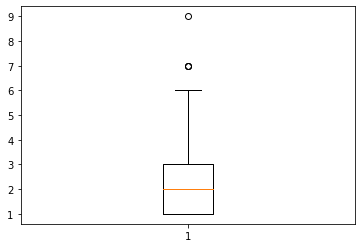

In [45]:
plt.boxplot(results)

9) Imagine they made the playoffs. Wow! Now the odds of winning each game has gone down to 25% because the competition is harder. They need to win all four games remaining to win the Super Bowl. What are their odds of winning the Super Bowl?

In [46]:
np.random.seed(42)
dist = stats.geom(0.25)
dist.pmf(4)

0.10546875

10) Given what we discussed in class, why might this example not follow a binomial distribution? Or - what would cause it to not follow a binomial distribution?

Binomial distribution uses independent bernoulli trials. However in this case, as each game is won the probability of winning a game increases so slightly due to less competition. Which is something binomial does not account for.

11) Say that, as per polling, that Joe Biden has a 50% chance of winning the Iowa primary in February. If I poll ten voters, what is the probability that exactly five of them will vote for him?

In [47]:
dist = stats.binom(n=10,p=0.5)
dist.pmf(5)

0.24609375000000025

12) What is the probabilty that between three and five of the voters will vote for him?

In [48]:
# Between three and five is three voters is my reasoning, not 100% sure.
dist.cdf(3)

0.17187499999999994

13) What are the odds that the second person I ask will vote for Joe Biden?

In [49]:
dist.pmf(2)

0.04394531249999999

14) What are the odds that the second person I ask is the first person I speak to who will vote for Joe Biden?

In [50]:
dist = stats.geom(0.5)
dist.pmf(3)

0.125

15) Stock A has a 70% chance of going down next year, which would cost your portfolio \\$100,000 if that were to happen. It has a 30% chance of going up, which would bring $500,000 to your portfolio. Should you invest in Stock A? What is your expected net return in this scenario? 

In [51]:
win_value = 0.3 * 500000
lose_value = 0.7 * 100000
net_value = win_value - lose_value
print('Going up value',win_value)
print('Going down value',lose_value)
print('Net value',net_value)

Going up value 150000.0
Going down value 70000.0
Net value 80000.0


Net value is positive, therefore you should invest in stock A.